In [43]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-08-10 05:17:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   231MB/s    in 0.5s    

2021-08-10 05:17:10 (231 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



In [44]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [45]:
!ls pizza_steak

test  train


In [46]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [47]:
import os
for dirpath, dirname,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filenames)} in {dirpath}")

There are 2 directories and 1 in pizza_steak
There are 2 directories and 1 in pizza_steak/train
There are 0 directories and 750 in pizza_steak/train/steak
There are 0 directories and 750 in pizza_steak/train/pizza
There are 2 directories and 1 in pizza_steak/test
There are 0 directories and 250 in pizza_steak/test/steak
There are 0 directories and 250 in pizza_steak/test/pizza


In [48]:
num_steak_images_train  = len(os.listdir("pizza_steak/train/steak"))

In [49]:
num_steak_images_train

750

In [50]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+"/"+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

['1645470.jpg']
Image shape: (512, 512, 3)


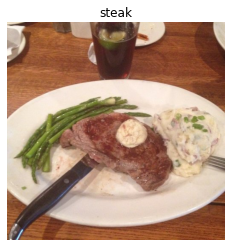

In [52]:
img = view_random_image("pizza_steak/train", "steak")

['2247711.jpg']
Image shape: (384, 512, 3)


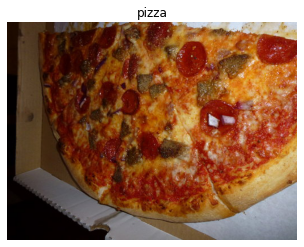

In [53]:
img = view_random_image("pizza_steak/train", "pizza")

In [54]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 27,   9,   0],
        [ 27,   9,   0],
        [ 27,   9,   0],
        ...,
        [207, 215, 226],
        [206, 216, 226],
        [207, 217, 227]],

       [[ 28,  10,   0],
        [ 28,  10,   0],
        [ 28,  10,   0],
        ...,
        [206, 214, 225],
        [204, 212, 223],
        [204, 212, 223]],

       [[ 29,  11,   0],
        [ 30,  12,   0],
        [ 30,  12,   0],
        ...,
        [202, 210, 223],
        [202, 210, 223],
        [205, 213, 226]],

       ...,

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [104, 113, 122],
        [102, 111, 120],
        [101, 110, 119]],

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [100, 109, 118],
        [ 99, 108, 117],
        [ 99, 108, 117]],

       [[  6,   0,   2],
        [  6,   0,   2],
        [  6,   0,   2],
        ...,
        [ 95, 104, 11

In [55]:
img.shape

(384, 512, 3)

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [57]:
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters = 10,
                                                             kernel_size = 3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding='valid'),
                                      tf.keras.layers.Conv2D(10,3,activation='relu'),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5844 - accuracy: 0.6753 - val_loss: 0.4097 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4326 - accuracy: 0.8040 - val_loss: 0.3558 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4149 - accuracy: 0.8140 - val_loss: 0.3410 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3940 - accuracy: 0.8380 - val_loss: 0.3398 - val_accuracy: 0.8940
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3389 - accuracy: 0.8593 - val_loss: 0.3124 - val_accuracy: 0.8760


In [58]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 28090)            

In [59]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224,224,3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 192ms/step - loss: 0.8167 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000


In [60]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224,224,3)),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3=model_3.fit(train_data,
                      batch_size = 32,
                      epochs = 5,
                      steps_per_epoch=len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 2.4197 - accuracy: 0.6487 - val_loss: 0.8798 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.9853 - accuracy: 0.6993 - val_loss: 0.8531 - val_accuracy: 0.6000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6398 - accuracy: 0.7347 - val_loss: 0.8351 - val_accuracy: 0.6560
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5889 - accuracy: 0.7533 - val_loss: 1.0355 - val_accuracy: 0.6180
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6619 - accuracy: 0.7393 - val_loss: 0.6467 - val_accuracy: 0.6860


In [61]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


['3460673.jpg']
Image shape: (512, 512, 3)
['1247645.jpg']
Image shape: (512, 341, 3)


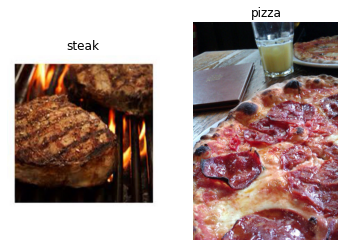

In [62]:
plt.figure()
plt.subplot(1,2,1)
steak_im = view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_im = view_random_image("pizza_steak/train","pizza")

In [63]:
!nvidia-smi


Tue Aug 10 05:19:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    27W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)

In [65]:
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size=32
                                               )
test_data = test_datagen.flow_from_directory(directory= test_dir,
                                             target_size = (224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [66]:
images, labels = train_data.next()

In [67]:
images.shape

(32, 224, 224, 3)

In [68]:
labels.shape

(32,)

In [69]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [70]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(input_shape = (224,224,3),
                                                      filters = 20,
                                                      kernel_size = 4,
                                                      strides = 1,
                                                      activation = 'relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [71]:
history_4=model_4.fit(train_data,
                      batch_size = 32,
                      epochs = 5,
                      steps_per_epoch=len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.7207 - accuracy: 0.5967 - val_loss: 0.6197 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5733 - accuracy: 0.6973 - val_loss: 0.5898 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4522 - accuracy: 0.7980 - val_loss: 0.4856 - val_accuracy: 0.7440
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3092 - accuracy: 0.8753 - val_loss: 0.4582 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.2262 - accuracy: 0.9253 - val_loss: 0.4562 - val_accuracy: 0.7840


In [72]:
### Evaluating model

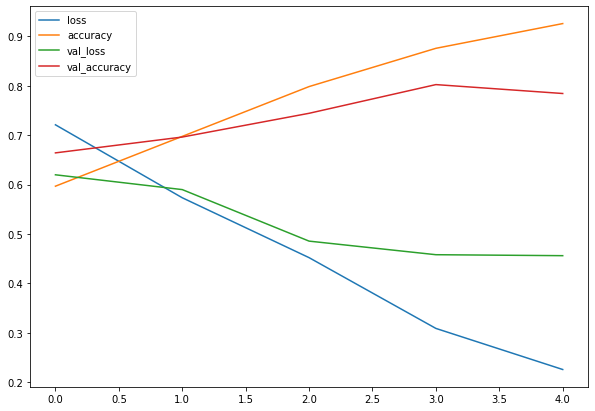

In [73]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [74]:
def plot_loss_curves(history):
  '''
  Returns separate loss cirve for training and validation metrics
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title("loss")
  plt.title("epochs")
  plt.legend()
   
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_acc, label = 'val_accuracy')
  plt.title("accuracy")
  plt.title("epochs")
  plt.legend()


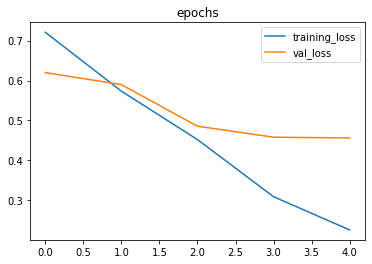

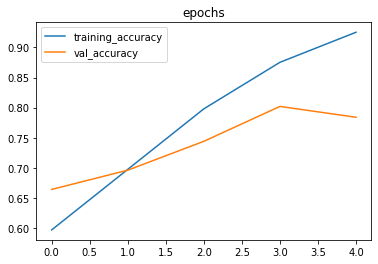

In [75]:
plot_loss_curves(history_4)

In [76]:
# Adjust model paramters
# Reducing overfitting

In [77]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Conv2D(10,3, activation='relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs = 5,
                        batch_size = 32,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.6040 - accuracy: 0.6853 - val_loss: 0.5113 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4641 - accuracy: 0.7927 - val_loss: 0.3615 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4229 - accuracy: 0.8140 - val_loss: 0.3200 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3846 - accuracy: 0.8273 - val_loss: 0.3517 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4028 - accuracy: 0.8267 - val_loss: 0.3036 - val_accuracy: 0.8760


In [78]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 6760)            

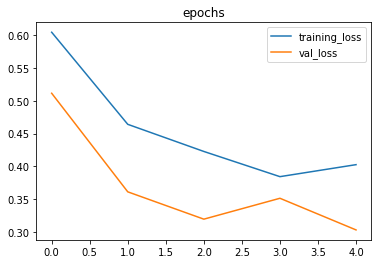

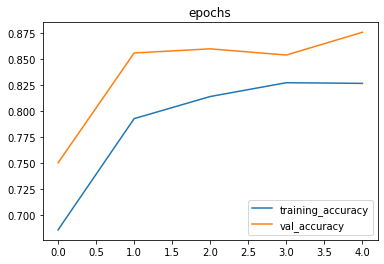

In [79]:
plot_loss_curves(history_5)

In [80]:
# Data augmentation
train_data_aug = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=0.2,# how much to rotate an image
                                    shear_range=0.2, # how much do yu want to shear an image
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.3,
                                    horizontal_flip=True
                                )
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [81]:
print("Augmented training data")
train_augemented= train_data_aug.flow_from_directory(train_dir,
                                                     target_size = (224,224),
                                                     class_mode = 'binary',
                                                     shuffle = False,
                                                     batch_size = 32)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode= 'binary',
                                               shuffle = False)

print("Non Augmented test data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size = (224,224),
                                             class_mode = 'binary'
                                          )

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


In [82]:
images,labels = train_data.next()
aug_images, aug_labels = train_augemented.next()

Showing image number: 17


(-0.5, 223.5, 223.5, -0.5)

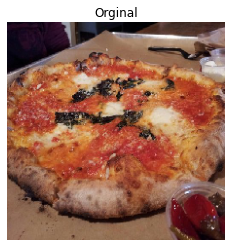

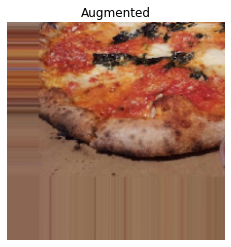

In [83]:
import random
random_number = random.randint(0, 32)
print(f'Showing image number: {random_number}')
plt.figure()
plt.imshow(images[random_number])
plt.title(f"Orginal")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f'Augmented')
plt.axis(False)


In [84]:
#Building the model
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,kernel_size=2,
                                                      input_shape=(224,224,3),
                                                      activation='relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Conv2D(10,3, activation='relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(2000, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_augemented,
                        epochs = 5,
                        steps_per_epoch = len(train_augemented),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 463ms/step - loss: 1.0238 - accuracy: 0.4120 - val_loss: 0.6923 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6904 - accuracy: 0.5540 - val_loss: 0.6853 - val_accuracy: 0.6580
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6924 - accuracy: 0.5440 - val_loss: 0.6792 - val_accuracy: 0.5060
Epoch 5/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6859 - accuracy: 0.5267 - val_loss: 0.6710 - val_accuracy: 0.6880


In [85]:
print("Augmented training data")
train_augemented_shuffle = train_data_aug.flow_from_directory(train_dir,
                                                     target_size = (224,224),
                                                     class_mode = 'binary',
                                                     shuffle = True,
                                                     batch_size = 32)

train_data_shuffle = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode= 'binary',
                                               shuffle = True)

print("Non Augmented test data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size = (224,224),
                                             class_mode = 'binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
#Building the model
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,kernel_size=2,
                                                      input_shape=(224,224,3),
                                                      activation='relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Conv2D(10,3, activation='relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(2000, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_7 = model_7.fit(train_augemented_shuffle,
                        epochs = 5,
                        steps_per_epoch = len(train_augemented_shuffle),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.8038 - accuracy: 0.5240